# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [26]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [27]:
# run this cell to upload file using GUI if you are using google colab

#from google.colab import files
#files.upload()

In [28]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [29]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Education/Residency6-NeuralNetworks/prices.csv')

In [30]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


## Question 2

### Drop null
- Drop null values if any

In [31]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [37]:
df.shape

(851264, 4)

In [38]:
df.dropna(inplace=True)

In [39]:
df.shape

(851264, 4)

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [32]:
df.drop(['date','symbol','volume'],axis=1,inplace=True)

## Question 3

### Print the dataframe
- print the modified dataframe

In [33]:
df.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [46]:
X=df.iloc[:,[0,2,3]]
#df.loc(['open','low','high'],axis=1)
y=df['close']
#y=df.pop('close')
#X=df

In [48]:
print(X.shape)
print(y.shape)

(851264, 3)
(851264,)


## Question 4

### Create train and test sets
- Split the data into training and testing

In [51]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=23)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [92]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [93]:
import numpy as np
y_train=np.array(y_train)
y_test=np.array(y_test)

In [94]:
print(type(X_train_scaled))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [95]:
X_train_scaled.shape

(638448, 3)

In [96]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [97]:
#Initialize Sequential model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,activation='linear',input_shape=(3,)))
model.output_shape

(None, 1)

In [98]:
model1=Sequential(
      [Input(shape=(3,)),Flatten(),
       Dense(1,activation='linear')])
model1.output_shape

(None, 1)

In [ ]:
#Reshape data from 2D to 1D -> 851264*3 to 2553792
#model.add(tf.keras.layers.Reshape((2553792,),input_shape=(851264,3,)))

#Normalize the data
#model.add(tf.keras.layers.BatchNormalization())

In [ ]:
from te

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [104]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model1.compile(optimizer=sgd_optimizer, loss='mse')
model.compile(optimizer=sgd_optimizer, loss='mse')

In [86]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [105]:
model.fit(X_train_scaled,y_train,        
          validation_data=(X_test_scaled,y_test),
          epochs=50,
          batch_size=128)

Epoch 1/50
4988/4988 [==============================] - 5s 970us/step - loss: 13.8186 - val_loss: 0.9662
Epoch 2/50
4988/4988 [==============================] - 5s 981us/step - loss: 0.9713 - val_loss: 0.9398
Epoch 3/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9505 - val_loss: 0.9937
Epoch 4/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9283 - val_loss: 0.9051
Epoch 5/50
4988/4988 [==============================] - 5s 992us/step - loss: 0.9102 - val_loss: 0.8774
Epoch 6/50
4988/4988 [==============================] - 5s 989us/step - loss: 0.8877 - val_loss: 0.8639
Epoch 7/50
4988/4988 [==============================] - 5s 989us/step - loss: 0.8705 - val_loss: 0.8773
Epoch 8/50
4988/4988 [==============================] - 5s 993us/step - loss: 0.8551 - val_loss: 0.8525
Epoch 9/50
4988/4988 [==============================] - 5s 993us/step - loss: 0.8379 - val_loss: 0.8138
Epoch 10/50
4988/4988 [==============================] - 5s 995us/s

In [100]:
model1.fit(X_train_scaled,y_train,        
          validation_data=(X_test_scaled,y_test),
          epochs=50,
          batch_size=128)

Epoch 1/50
4988/4988 [==============================] - 5s 1ms/step - loss: 13.9956 - val_loss: 0.9675
Epoch 2/50
4988/4988 [==============================] - 5s 963us/step - loss: 0.9789 - val_loss: 0.9437
Epoch 3/50
4988/4988 [==============================] - 5s 994us/step - loss: 0.9566 - val_loss: 0.9281
Epoch 4/50
4988/4988 [==============================] - 5s 975us/step - loss: 0.9347 - val_loss: 0.9689
Epoch 5/50
4988/4988 [==============================] - 5s 969us/step - loss: 0.9142 - val_loss: 0.9192
Epoch 6/50
4988/4988 [==============================] - 5s 993us/step - loss: 0.8942 - val_loss: 0.8941
Epoch 7/50
4988/4988 [==============================] - 5s 989us/step - loss: 0.8757 - val_loss: 0.8809
Epoch 8/50
4988/4988 [==============================] - 5s 976us/step - loss: 0.8624 - val_loss: 0.8301
Epoch 9/50
4988/4988 [==============================] - 5s 968us/step - loss: 0.8418 - val_loss: 0.8145
Epoch 10/50
4988/4988 [==============================] - 5s 979us

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [101]:
model1.evaluate(X_test_scaled,y_test)

6651/6651 [==============================] - 4s 660us/step - loss: 0.4986


0.49861329793930054

In [106]:
model.evaluate(X_test_scaled,y_test)

6651/6651 [==============================] - 5s 684us/step - loss: 0.4929


0.49289825558662415

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [111]:
 model.predict(sc.transform([[123.430000, 122.30999, 116.250000]]))

array([[118.35821]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [114]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

### Change train and test labels into one-hot vectors

In [115]:
trainX.shape

(60000, 28, 28)

In [117]:
trainY.shape

(60000,)

In [118]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [119]:
trainY

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Build the Graph

### Initialize model, reshape & normalize data

In [130]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [131]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
## Add drop out as layer
model.add(tf.keras.layers.Dropout(0.25))
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
## Add drop out as layer
model.add(tf.keras.layers.Dropout(0.25))


In [132]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_15 (Dense)             (None, 200)               157000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
Total params: 180,236
Trainable params: 178,668
Non-trainable params: 1,568
___________________________________________

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [133]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [136]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_15 (Dense)             (None, 200)               157000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)              

In [134]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [137]:
# Train the model
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5662 - accuracy: 0.7985 - val_loss: 0.4101 - val_accuracy: 0.8472
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4384 - accuracy: 0.8410 - val_loss: 0.3903 - val_accuracy: 0.8552
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4004 - accuracy: 0.8554 - val_loss: 0.3689 - val_accuracy: 0.8652
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3792 - accuracy: 0.8610 - val_loss: 0.3663 - val_accuracy: 0.8655
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3622 - accuracy: 0.8676 - val_loss: 0.3667 - val_accuracy: 0.8697
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3526 - accuracy: 0.8705 - val_loss: 0.3509 - val_accuracy: 0.8792
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3392 - accuracy: 0.8757 - val_loss: 0.3475 - val_accuracy:

In [138]:
test_loss,test_acc=model.evaluate(testX,testY)

313/313 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.8782


In [141]:
# Validating predicting data with actual data
predictions=model.predict(testX)

In [142]:
np.argmax(predictions[10])

4

In [143]:
testY[10]
# Predicted value is class 4 which matches with actual value

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

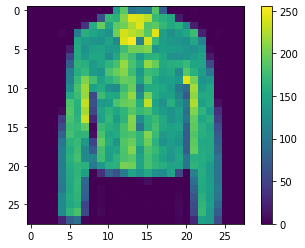

In [146]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(testX[10])
plt.colorbar()
plt.grid(False)
plt.show()
